### Q1: What are Missing Values in a Dataset?
Missing values occur when some observations in a dataset lack recorded information for certain variables. This can happen due to data collection errors, survey non-responses, sensor failures, or human mistakes.

Why is it Essential to Handle Missing Values?
Handling missing values is crucial because:
✅ Prevents Bias – Missing data can introduce biases, leading to incorrect conclusions.
✅ Ensures Model Performance – Many ML algorithms fail or perform poorly with missing values.
✅ Avoids Data Loss – Simply removing missing rows may lead to significant data loss.
✅ Maintains Data Integrity – Proper handling preserves the statistical properties of the dataset.

Algorithms That Are NOT Affected by Missing Values
Some algorithms can handle missing values inherently, including:

🔹 Tree-Based Models:

Decision Trees (CART)
Random Forest
XGBoost (can handle missing values internally)
LightGBM
🔹 k-Nearest Neighbors (KNN) – If distance metrics can be modified to ignore missing values.

🔹 Naive Bayes – Works with missing values by ignoring them during probability estimation.

### Q2: List down techniques used to handle missing data. Give an example of each with python code.

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
df=pd.read_csv("Ship_Performance_Dataset.csv")

In [118]:
df

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,None,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,2024-06-02,Tanker,Short-haul,Heavy Fuel Oil (HFO),Good,11.607997,2918.395972,239.990359,13.700906,Moderate,318.111891,237975.067292,731584.322921,47.152337,1.000265,1.284895,3,74.813114
2732,2024-06-09,Bulk Carrier,Short-haul,Heavy Fuel Oil (HFO),Good,13.852798,2161.282358,831.355653,14.612775,None,218.309002,21029.021721,374365.370930,64.325916,0.653474,0.891085,2,84.595155
2733,2024-06-16,Container Ship,Short-haul,Steam Turbine,Critical,16.813713,1343.608006,1376.460622,9.306518,None,1630.646419,78883.312529,234120.365052,53.551090,0.594169,0.725404,6,80.975269
2734,2024-06-23,Tanker,Transoceanic,Heavy Fuel Oil (HFO),Good,23.132643,2028.143572,619.236340,6.623856,Moderate,153.441965,25241.550250,799713.737211,14.335517,0.895670,0.902960,2,92.853622


In [119]:
df['Route_Type']=df['Route_Type'].replace({'None' : np.nan})

In [120]:
df.isnull().sum()

Date                         0
Ship_Type                    0
Route_Type                 136
Engine_Type                  0
Maintenance_Status           0
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition            0
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64

In [121]:
print(df['Route_Type'].unique())
print(df['Route_Type'].unique())

[nan 'Short-haul' 'Long-haul' 'Transoceanic' 'Coastal']
[nan 'Short-haul' 'Long-haul' 'Transoceanic' 'Coastal']


In [122]:
columns=df.columns

In [123]:
columns

Index(['Date', 'Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status',
       'Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm',
       'Draft_meters', 'Weather_Condition', 'Cargo_Weight_tons',
       'Operational_Cost_USD', 'Revenue_per_Voyage_USD',
       'Turnaround_Time_hours', 'Efficiency_nm_per_kWh',
       'Seasonal_Impact_Score', 'Weekly_Voyage_Count',
       'Average_Load_Percentage'],
      dtype='object')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2736 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2736 non-null   object 
 4   Maintenance_Status       2736 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2736 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [125]:
df['Date']=pd.to_datetime(df['Date'])

In [126]:
def get_unique_values(df):
    columns=df.columns
    for column in columns:
        if df[column].dtypes == 'object':
            print(column  , df[column].unique())

In [127]:
get_unique_values(df)

Ship_Type ['Container Ship' 'Fish Carrier' 'Bulk Carrier' 'None' 'Tanker']
Route_Type [nan 'Short-haul' 'Long-haul' 'Transoceanic' 'Coastal']
Engine_Type ['Heavy Fuel Oil (HFO)' 'Steam Turbine' 'Diesel' 'None']
Maintenance_Status ['Critical' 'Good' 'Fair' 'None']
Weather_Condition ['Moderate' 'Rough' 'Calm' 'None']


In [128]:
def replace_None(df):
    columns=df.columns
    for column in columns:
        if df[column].dtypes == 'object':
            df[column] = df[column].replace({'None' : np.nan})

In [129]:
replace_None(df)

In [130]:
df.isnull().sum()

Date                         0
Ship_Type                  136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition          136
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64

In [131]:
df.dtypes

Date                       datetime64[ns]
Ship_Type                          object
Route_Type                         object
Engine_Type                        object
Maintenance_Status                 object
Speed_Over_Ground_knots           float64
Engine_Power_kW                   float64
Distance_Traveled_nm              float64
Draft_meters                      float64
Weather_Condition                  object
Cargo_Weight_tons                 float64
Operational_Cost_USD              float64
Revenue_per_Voyage_USD            float64
Turnaround_Time_hours             float64
Efficiency_nm_per_kWh             float64
Seasonal_Impact_Score             float64
Weekly_Voyage_Count                 int64
Average_Load_Percentage           float64
dtype: object

In [132]:
def get_numeric_cols(df):
    columns=df.columns
    for column in columns:
        if df[column].dtypes == "float64":
            if None in df[column]:
                print(df[column])
            else:
                print("No None found")
get_numeric_cols(df)

No None found
No None found
No None found
No None found
No None found
No None found
No None found
No None found
No None found
No None found
No None found


#### ***Mode Imputation***

In [133]:
null_df=df.isnull().sum()

In [134]:
null_df=pd.DataFrame(data=null_df).reset_index()

In [135]:
null_df.columns=[
    'index',
    'null_count'
]

In [136]:
null_df=null_df[null_df['null_count']!=0]

In [137]:
null_df

,index,null_count
1,Ship_Type,136
2,Route_Type,136
3,Engine_Type,136
4,Maintenance_Status,136
9,Weather_Condition,136


#### **Ship_Type -- Mode Imputatio**

In [138]:
df['Ship_Type'].unique()

array(['Container Ship', 'Fish Carrier', 'Bulk Carrier', nan, 'Tanker'],
      dtype=object)

In [139]:
df[df['Ship_Type'].notna()]['Ship_Type'].mode()

0    Bulk Carrier
Name: Ship_Type, dtype: object

In [140]:
df['Ship_Type'].fillna('Bulk Carrier' , inplace=True)

In [141]:
df['Ship_Type'].unique()

array(['Container Ship', 'Fish Carrier', 'Bulk Carrier', 'Tanker'],
      dtype=object)

#### **Route_Type -- Random Sampling**

In [142]:
df[df['Route_Type'].notna()]['Route_Type'].sample(n=1)

80    Short-haul
Name: Route_Type, dtype: object

In [143]:
df['Route_Type'].fillna('Coastal' , inplace=True)

In [144]:
df['Route_Type'].unique()

array(['Coastal', 'Short-haul', 'Long-haul', 'Transoceanic'], dtype=object)

### **Engine_Type -- ffill : filling nan with last known value** 

In [145]:
df['Engine_Type'].unique()

array(['Heavy Fuel Oil (HFO)', 'Steam Turbine', 'Diesel', nan],
      dtype=object)

In [146]:
df['Engine_Type']=df['Engine_Type'].fillna(method='ffill')

In [115]:
df['Engine_Type'].isnull().sum()

0

### **Maintenance_Status - bfill:filling nan with the next known value** 

In [147]:
df['Maintenance_Status'].unique()

array(['Critical', 'Good', 'Fair', nan], dtype=object)

In [150]:
df['Maintenance_Status']=df['Maintenance_Status'].fillna(method='bfill')

In [151]:
df['Maintenance_Status'].isnull().sum()

0

### **Weather_Condition -- Automation**

In [182]:
temp=df.isnull().sum()
temp=pd.DataFrame(temp).reset_index()
null_index=list(temp[temp[0]!=0]['index'])
print(null_index)

['Weather_Condition']


In [186]:
def fillna_auto(df):
    temp=df.isnull().sum()
    temp=pd.DataFrame(temp).reset_index()
    null_index=list(temp[temp[0]!=0]['index'])
    
    for col in null_index:
        column_mode=df[df[col].notna()][col].mode()
        column_mode=list(column_mode)[0]
        column_mode
        df[col]=df[col].fillna(column_mode)

In [187]:
fillna_auto(df)

In [190]:
df['Weather_Condition'].unique()

array(['Moderate', 'Rough', 'Calm'], dtype=object)

### **All the nan values filled up**

In [191]:
df.isnull().sum()

Date                       0
Ship_Type                  0
Route_Type                 0
Engine_Type                0
Maintenance_Status         0
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Weather_Condition          0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64

## **Mean , Median imputation technique**

In [309]:
df=pd.read_csv("laptopData.csv")

In [310]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [311]:
df.isnull().sum()

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [312]:
df['Price'].mean()

59955.81407321288

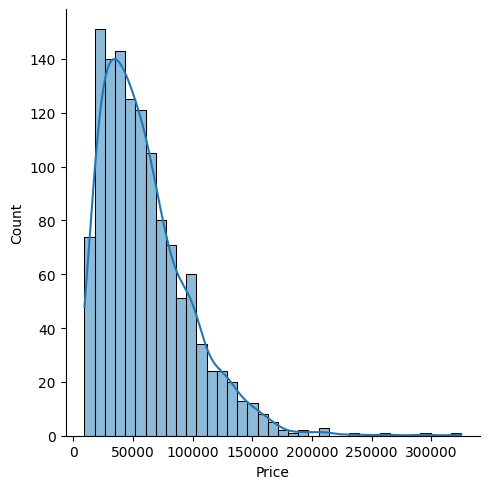

In [313]:
sns.displot(df['Price'] , kde=True)

In [314]:
df['Price'].fillna(df['Price'].median() , inplace=True)

In [315]:
df.isnull().sum()

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price                0
dtype: int64

In [316]:
df.drop(['Unnamed: 0'] , axis=1 , inplace=True)

In [317]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

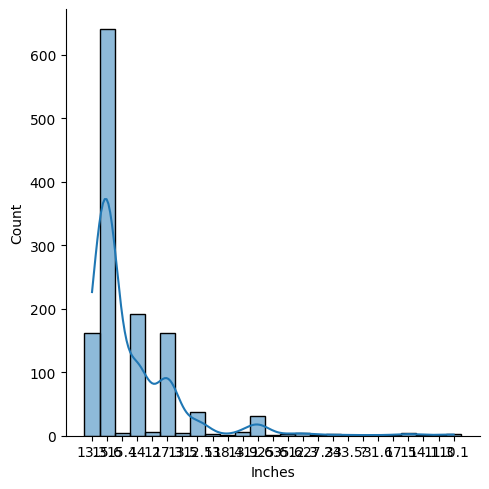

In [318]:
sns.displot(df['Inches'] , kde=True)

In [319]:
df['Inches'].unique()

array(['13.3', '15.6', '15.4', '14', '12', nan, '17.3', '13.5', '12.5',
       '13', '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '?', '31.6', '17', '15', '14.1', '11.3', '10.1'],
      dtype=object)

In [320]:
df['Inches']=df['Inches'].replace({'?' : np.nan})

In [321]:
df['Inches']=pd.to_numeric(df['Inches'])

In [322]:
df['Inches'].isnull().sum()

31

In [323]:
df.isnull().sum()

Company             30
TypeName            30
Inches              31
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price                0
dtype: int64

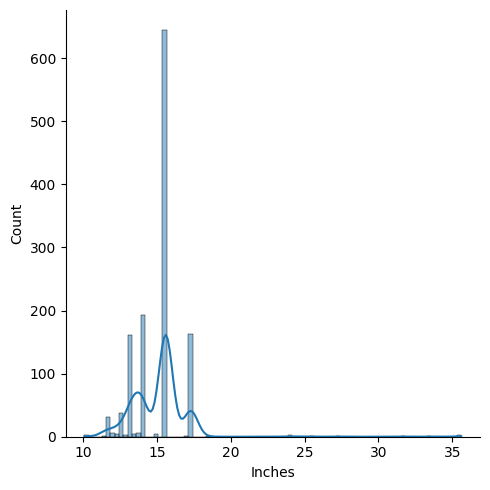

In [324]:
sns.displot(df['Inches'] , kde=True)

In [325]:
mean_weight=round(df['Inches'].mean() , 1)

In [326]:
mean_weight

15.1

In [327]:
df.isnull().sum()

Company             30
TypeName            30
Inches              31
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price                0
dtype: int64

In [328]:
df['Inches'].fillna(mean_weight , inplace=True)

In [329]:
df.shape

(1303, 11)

In [330]:
df.isnull().sum()

Company             30
TypeName            30
Inches               0
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price                0
dtype: int64

### **Replacing object data type columns with automation**

In [331]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [332]:
df.isnull().sum()

Company             30
TypeName            30
Inches               0
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price                0
dtype: int64

In [333]:
temp=df.isnull().sum()
temp=pd.DataFrame(temp).reset_index()
null_value=temp[temp[0]!=0]
null_cols=list(null_value['index'])
null_cols

['Company',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Weight']

In [339]:
mode_value=list(df[df['Company'].notna()]['Company'].mode())
mode_value[0]

'Lenovo'

In [340]:
def fillna_mode(df):
    temp=df.isnull().sum()
    temp=pd.DataFrame(temp).reset_index()
    null_value=temp[temp[0]!=0]
    null_cols=list(null_value['index'])
        
    for col in null_cols:
        mode_value=df[df[col].notna()][col].mode()
        df[col].fillna(mode_value[0] , inplace=True)
        

In [341]:
fillna_mode(df)

In [342]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

### Q3: Explain the imbalanced data. What will happen if imbalanced data is not handled?



Imbalanced data refers to a dataset where the number of observations in different classes is unevenly distributed. This is common in classification problems, such as fraud detection, medical diagnosis, and spam detection.

For example, in a fraud detection dataset:

Non-Fraud Transactions (Class 0): 99,000 samples
Fraud Transactions (Class 1): 1,000 samples
Here, the dataset is highly imbalanced because the majority class (non-fraud) dominates the minority class (fraud).


Problems If Imbalanced Data is Not Handled


1. Biased Model

2. Reduces Accuracy

3. Model cannot generalize - model fails to learn meaningful patterns in the data

How to Handle Imbalanced Data?

1. Resampling : SMOTE

2. Up Sampling / Down Sampling 



### Q4: What are Up-sampling and Down-sampling? Explain with an example when up-sampling and down-sampling are required.


Up-sampling : to increase the number of samples in the minority class , but no new samples are created rather the same datapoint is incremented from the minority class .

Down sampling : to reduce the sample of the majority class so that the dataset is balanced

In [371]:
n_sample=1000
n_class_0_pct=0.9
class_0=int(n_sample*n_class_0_pct)
class_1=n_sample-class_0

class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=0 , scale=1 , size= class_0),
    'feature_2' : np.random.normal(loc=0 , scale=1 , size=class_0),
    'target' : [0] * class_0
})

class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=0 , scale=1 , size=class_1),
    'feature_2' : np.random.normal(loc=0 , scale=1 , size=class_1) , 
    'target' : [1] * class_1
})

In [372]:
class_1

,feature_1,feature_2,target
0,0.453824,0.144033,1
1,1.422226,0.659856,1
2,-0.027443,0.892767,1
3,-0.273302,1.424092,1
4,-0.753044,-0.672545,1
...,...,...,...
95,-0.697469,-1.290255,1
96,0.225901,1.096447,1
97,0.421895,1.344051,1
98,0.778877,0.565434,1


In [373]:
class_0

,feature_1,feature_2,target
0,-0.019536,1.865815,0
1,0.878209,0.271793,0
2,0.133781,-2.693590,0
3,-0.356259,0.049766,0
4,-0.914269,0.756228,0
...,...,...,...
895,-0.859254,0.116461,0
896,1.251492,1.028282,0
897,0.548898,-1.322886,0
898,0.876428,-0.078358,0


In [374]:
df=pd.concat([class_0 , class_1] , axis=0).reset_index()

In [375]:
df

,index,feature_1,feature_2,target
0,0,-0.019536,1.865815,0
1,1,0.878209,0.271793,0
2,2,0.133781,-2.693590,0
3,3,-0.356259,0.049766,0
4,4,-0.914269,0.756228,0
...,...,...,...,...
995,95,-0.697469,-1.290255,1
996,96,0.225901,1.096447,1
997,97,0.421895,1.344051,1
998,98,0.778877,0.565434,1


In [376]:
df.drop(['index'] , axis=1 , inplace=True)

In [377]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [380]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [381]:
df_minority

,feature_1,feature_2,target
900,0.453824,0.144033,1
901,1.422226,0.659856,1
902,-0.027443,0.892767,1
903,-0.273302,1.424092,1
904,-0.753044,-0.672545,1
...,...,...,...
995,-0.697469,-1.290255,1
996,0.225901,1.096447,1
997,0.421895,1.344051,1
998,0.778877,0.565434,1


In [382]:
df_majority

,feature_1,feature_2,target
0,-0.019536,1.865815,0
1,0.878209,0.271793,0
2,0.133781,-2.693590,0
3,-0.356259,0.049766,0
4,-0.914269,0.756228,0
...,...,...,...
895,-0.859254,0.116461,0
896,1.251492,1.028282,0
897,0.548898,-1.322886,0
898,0.876428,-0.078358,0


In [383]:
from sklearn.utils import resample

df_minority_upsampled=resample(df_minority , replace=True , n_samples=len(df_majority) , random_state=142)
df_minority_upsampled

,feature_1,feature_2,target
921,1.024350,-0.519442,1
969,1.075590,-0.068637,1
927,0.672771,-0.634195,1
912,0.220464,1.269772,1
926,0.163113,0.779390,1
...,...,...,...
970,0.587692,0.625692,1
905,1.268987,0.175707,1
904,-0.753044,-0.672545,1
900,0.453824,0.144033,1


In [384]:
df=pd.concat([df_majority , df_minority_upsampled] , axis=0)

In [385]:
df

,feature_1,feature_2,target
0,-0.019536,1.865815,0
1,0.878209,0.271793,0
2,0.133781,-2.693590,0
3,-0.356259,0.049766,0
4,-0.914269,0.756228,0
...,...,...,...
970,0.587692,0.625692,1
905,1.268987,0.175707,1
904,-0.753044,-0.672545,1
900,0.453824,0.144033,1


### **Downsample**

In [387]:
n_sample=1000
n_class_0_pct=0.9
class_0=int(n_sample*n_class_0_pct)
class_1=n_sample-class_0

class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=0 , scale=1 , size= class_0),
    'feature_2' : np.random.normal(loc=0 , scale=1 , size=class_0),
    'target' : [0] * class_0
})

class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=0 , scale=1 , size=class_1),
    'feature_2' : np.random.normal(loc=0 , scale=1 , size=class_1) , 
    'target' : [1] * class_1
})

In [390]:
df=pd.concat([class_0  , class_1]).reset_index(drop=True)

In [391]:
df

,feature_1,feature_2,target
0,0.242831,-0.027322,0
1,-1.316681,1.272801,0
2,0.231454,-0.022601,0
3,0.070773,-0.483606,0
4,0.246936,0.330920,0
...,...,...,...
995,-1.927722,0.040410,1
996,-1.020541,-0.807962,1
997,0.105545,0.175023,1
998,0.723689,0.789105,1


In [392]:
df_minority=df[df['target']==1]

In [393]:
df_majority=df[df['target']==0]

In [395]:
from sklearn.utils import resample
down_scaled=resample(df_majority, replace=False , n_samples=len(df_minority))
down_scaled=down_scaled.reset_index(drop=True)

In [396]:
down_scaled

,feature_1,feature_2,target
0,0.450688,1.603669,0
1,-1.311378,0.611379,0
2,-1.437840,0.625386,0
3,-0.159315,0.181090,0
4,-1.075604,-1.015208,0
...,...,...,...
95,-1.632898,0.083625,0
96,0.274804,0.751072,0
97,0.122697,-1.217296,0
98,1.519794,0.449517,0


In [397]:
df=pd.concat([down_scaled , df_minority] , axis=0).reset_index(drop=True)

In [398]:
df

,feature_1,feature_2,target
0,0.450688,1.603669,0
1,-1.311378,0.611379,0
2,-1.437840,0.625386,0
3,-0.159315,0.181090,0
4,-1.075604,-1.015208,0
...,...,...,...
195,-1.927722,0.040410,1
196,-1.020541,-0.807962,1
197,0.105545,0.175023,1
198,0.723689,0.789105,1


### What is data Augmentation? Explain SMOTE.

Data augmentation is a technique used to increase the amount of data by artificially generating new data points. In the context of handling imbalanced datasets, data augmentation helps by adding more samples to the minority class, thereby improving model performance and reducing bias.

This is particularly important because imbalanced datasets can lead to biased ML models, where the model favors the majority class, resulting in poor accuracy for minority class predictions.

SMOTE (Synthetic Minority Over-sampling Technique):
SMOTE is a statistical resampling technique that generates synthetic data points for the minority class instead of simply duplicating existing ones.

It works by using k-Nearest Neighbors (KNN) to create new synthetic samples between existing minority class points.
These new points fall within the range of existing data and follow the same distribution, making them more realistic.
This helps in balancing the dataset, improving model learning without overfitting to duplicated data.

In [400]:
from sklearn.datasets import make_classification
X , y = make_classification(n_samples=1000 , n_features=2 , n_clusters_per_class=1 , weights=[0.90] ,n_redundant=0)

In [401]:
X=pd.DataFrame(X , columns=['f1' , 'f2'])
y=pd.DataFrame(y , columns=['target'])

In [402]:
X

,f1,f2
0,-1.192809,-0.876159
1,-0.614744,-1.601903
2,-1.465197,0.100651
3,-1.594065,0.483221
4,-1.679383,-0.638046
...,...,...
995,-0.316234,-1.782007
996,-0.833699,-0.878334
997,-0.066377,-1.580619
998,-0.540804,-0.971612


In [403]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [404]:
df=pd.concat([X , y] ,axis=1)

In [405]:
df

,f1,f2,target
0,-1.192809,-0.876159,0
1,-0.614744,-1.601903,0
2,-1.465197,0.100651,0
3,-1.594065,0.483221,0
4,-1.679383,-0.638046,0
...,...,...,...
995,-0.316234,-1.782007,0
996,-0.833699,-0.878334,0
997,-0.066377,-1.580619,0
998,-0.540804,-0.971612,0


In [409]:
df['target'].value_counts()

0    897
1    103
Name: target, dtype: int64

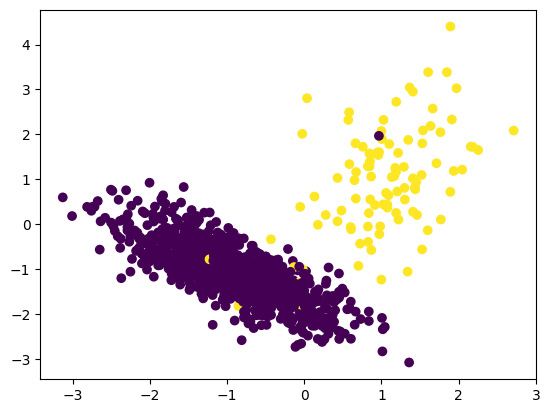

In [411]:
plt.scatter(df['f1'] , df['f2'] , c=df['target'])

In [415]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X , y = smote.fit_resample(df[['f1','f2']] , df['target'])

In [417]:
X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [422]:
df=pd.concat([X ,y] , axis=1).reset_index(drop=True)

In [423]:
df

,f1,f2,target
0,-1.192809,-0.876159,0
1,-0.614744,-1.601903,0
2,-1.465197,0.100651,0
3,-1.594065,0.483221,0
4,-1.679383,-0.638046,0
...,...,...,...
1789,1.279439,-0.979951,1
1790,0.810363,0.520323,1
1791,1.266741,2.805123,1
1792,1.080112,0.507086,1


In [424]:
df['target'].value_counts()

0    897
1    897
Name: target, dtype: int64

In [431]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()

X,y=smote.fit_resample(df[['f1' ,'f2']] , df['target'])
df1=pd.DataFrame(X)
df2=pd.DataFrame(y)
df=pd.concat([df1 , df2] , axis=1).reset_index(drop=True)
df

,f1,f2,target
0,-1.192809,-0.876159,0
1,-0.614744,-1.601903,0
2,-1.465197,0.100651,0
3,-1.594065,0.483221,0
4,-1.679383,-0.638046,0
...,...,...,...
1789,1.279439,-0.979951,1
1790,0.810363,0.520323,1
1791,1.266741,2.805123,1
1792,1.080112,0.507086,1


In [432]:
df.shape

(1794, 3)

### Q6: What are outliers in a dataset? Why is it essential to handle outliers?


Outliers : Abnormal points in the dataset

Why handle ? : 1. Skewed analysis issue 
               2. ML model reduces the accuracy
               3. Biased Decision-Making
               
How to handle : Box-plot , 5 number summary

In [444]:
dp = [52, 93, 15, 72, 61, 21, 83, 87, 75, 89, 80, 39, 42, 44, 71, 90, 48, 26, 77, 99 , 200 , 300 , 400]

In [445]:
type(dp)

list

In [446]:
dp.sort()

In [447]:
print(dp)

[15, 21, 26, 39, 42, 44, 48, 52, 61, 71, 72, 75, 77, 80, 83, 87, 89, 90, 93, 99, 200, 300, 400]


In [448]:
minimum , q1 , median , q3 , maximum =np.quantile(dp , [0 , 0.25 ,0.50 , 0.75 , 1])

In [449]:
print(minimum , q1 , median , q3 , maximum)

15.0 46.0 75.0 89.5 400.0


In [450]:
IQR=q3-q1

In [451]:
LF=q1-(1.5*IQR)
HF=q3+(1.5*IQR)

In [452]:
print(LF , HF)

-19.25 154.75


<Axes: >

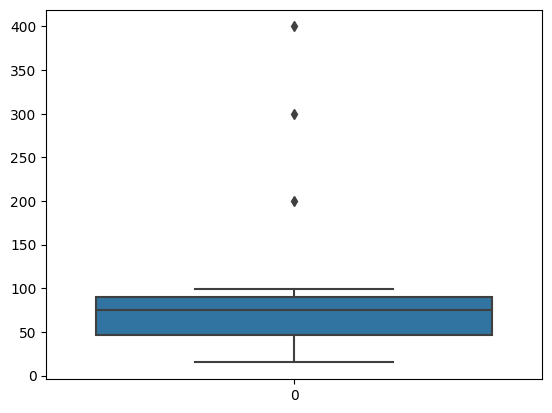

In [453]:
sns.boxplot(dp)

### Q7: You are working on a project that requires analyzing customer data. However, you notice that some ofthe data is missing. What are some techniques you can use to handle the missing data in your analysis?



Handling Missing Data in Customer Analysis
Missing data is a common issue in datasets, and handling it properly is crucial for maintaining analysis accuracy. Here are some techniques to deal with missing data:

🔹 1. Removing Missing Data
✔ Drop Missing Rows (df.dropna()) → If only a few rows have missing values, they can be removed.
✔ Drop Columns with Many Missing Values (df.drop(columns=['col_name'])) → If a column has too many missing values (>50%), it may be useless and should be dropped.

Example:

python
Copy
Edit
df.dropna(inplace=True)  # Removes all rows with missing values
df.drop(columns=['Customer_ID'], inplace=True)  # Drops an entire column
When to use? → When missing values are very few and won’t affect the analysis.

🔹 2. Filling Missing Values (Imputation)
If removing data is not an option, we can fill missing values using different techniques:

✅ Forward Fill (ffill) → Uses the last known value
✅ Backward Fill (bfill) → Uses the next known value
✅ Mean/Median Imputation → Replaces missing values with the average/median of the column
✅ Mode Imputation → For categorical data, replace missing values with the most frequent value

Example:

python
Copy
Edit
df['Age'].fillna(df['Age'].mean(), inplace=True)  # Filling with mean
df['Salary'].fillna(df['Salary'].median(), inplace=True)  # Filling with median
df['City'].fillna(df['City'].mode()[0], inplace=True)  # Filling categorical values with mode
df['Purchase_Amount'].fillna(method='ffill', inplace=True)  # Forward fill
When to use?

Mean → When data is normally distributed
Median → When data is skewed (right or left)
Mode → When working with categorical data
Forward/Backward Fill → When data has a time sequence
🔹 3. Predicting Missing Values (Advanced Techniques)
✔ Regression Models → Predict missing values using other features
✔ KNN Imputation (KNeighborsRegressor) → Uses the nearest neighbors to estimate missing values
✔ ML-Based Imputation (SimpleImputer) → Automatically fills missing values

Example using sklearn SimpleImputer:

python
Copy
Edit
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Can be 'median' or 'most_frequent'
df['Salary'] = imputer.fit_transform(df[['Salary']])
When to use? → When missing data is not random and can be predicted

### Q8: You are working with a large dataset and find that a small percentage of the data is missing. What are some strategies you can use to determine if the missing data is missing at random or if there is a pattern to the missing data?


1️⃣ Check the Missing Data Percentage
If <5% of the data is missing, it’s likely missing at random.
If >30% is missing in a specific column, investigate further.
If missingness depends on other variables, it’s Missing at Random (MAR).
If missingness is completely independent, it’s Missing Completely at Random (MCAR).
If missingness depends on the value itself, it’s Missing Not at Random (MNAR).


### Q9: Suppose you are working on a medical diagnosis project and find that the majority of patients in the dataset do not have the condition of interest, while a small percentage do. What are some strategies you can use to evaluate the performance of your machine learning model on this imbalanced dataset?


